In [1]:
from pathlib import Path
import pandas as pd

from utils import *
from dataloaders import *
from data_preparation import *
from allResNets import *
from MobileNetV3 import *
from engine import *
from efficientNet import *
from data_transforms import *

change_to_disk()
models_path = Path('Models_150')

In [2]:
NUM_EPOCHS = 150
device = get_device()

resnet18 = ResNet18()
resnet50 = ResNet50()
mobnet_sml = MobileNetSmall()
mobnet_lrg = MobileNetLarge()
effnetb0 = EfficientNetB0()
effnetb5 = EfficientNetB5()

loss_fn = nn.CrossEntropyLoss()

In [3]:
model_name = "ResNet18"
model = ResNet18
res18_results, final_res18_model, best_res18_model = load_results_model(model_name, models_path, model, NUM_EPOCHS, 147, device)
print("Done")

Done


In [4]:
model_name = "ResNet50"
model = ResNet50
res50_results, final_res50_model, best_res50_model = load_results_model(model_name, models_path, model, NUM_EPOCHS, 145, device)

print("Done")

Done


In [5]:
model_name = "MobileNetSmall"
model = MobileNetSmall
mobnet_sml_results, final_mobnet_sml_model, best_mobnet_sml_model = load_results_model(model_name, models_path, model, NUM_EPOCHS, 98, device)
print("Done")

Done


In [6]:
model_name = "MobileNetLarge"
model = MobileNetLarge
mobnet_lrg_results, final_mobnet_lrg_model, best_mobnet_lrg_model = load_results_model(model_name, models_path, model, NUM_EPOCHS, 111, device)
print("Done")

Done


In [7]:
model_name = "EfficientNetB0"
model = EfficientNetB0
effnetb0_results, final_effnetb0_model, best_effnetb0_model = load_results_model(model_name, models_path, model, NUM_EPOCHS, 139, device)
print("Done")

Done


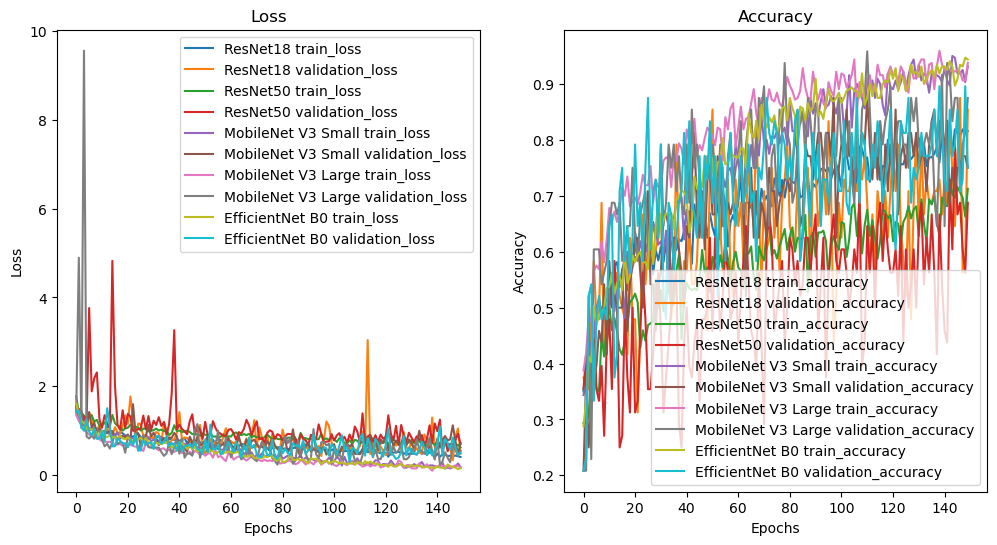

In [8]:
models_results = [
    res18_results[0],
    res50_results[0],
    mobnet_sml_results[0],
    mobnet_lrg_results[0],
    effnetb0_results[0]
]

models_titles =[
    "ResNet18",
    "ResNet50",
    "MobileNet V3 Small",
    "MobileNet V3 Large",
    "EfficientNet B0"
]

plot_all_loss_curves(models_results, models_titles)

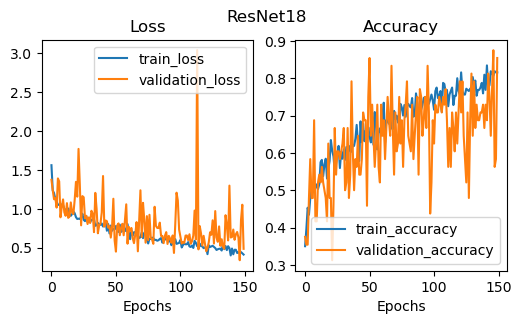

In [9]:
plot_loss_curves(res18_results[0],"ResNet18")

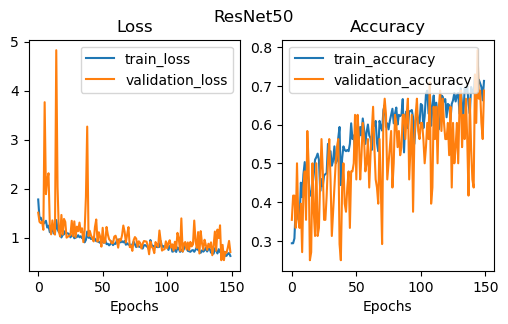

In [10]:
plot_loss_curves(res50_results[0],"ResNet50")

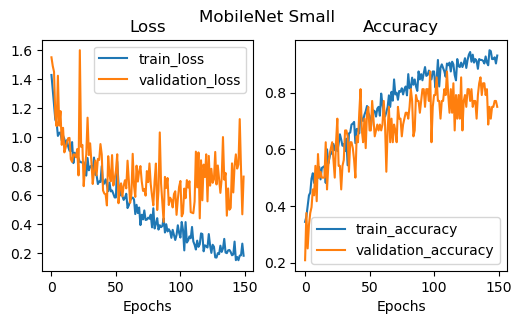

In [11]:
plot_loss_curves(mobnet_sml_results[0],"MobileNet Small")

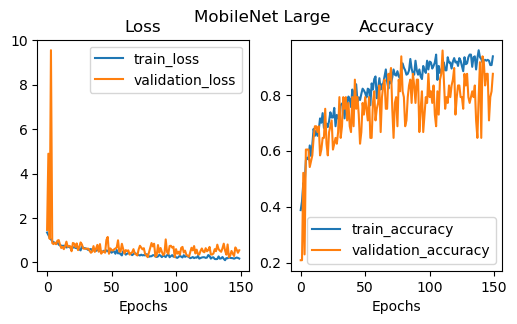

In [12]:
plot_loss_curves(mobnet_lrg_results[0],"MobileNet Large")

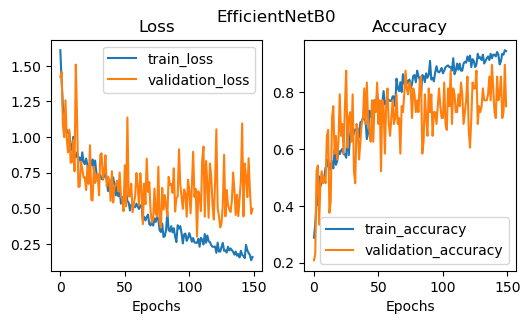

In [13]:
plot_loss_curves(effnetb0_results[0],"EfficientNetB0")

In [14]:
# data_dir = Path("new_split_100/")

# BATCH_SIZE=16

# image_shape = (1080, 1920)
# resize_factor = 0.3
# resize = np.multiply(image_shape,resize_factor)
# resize = [int(resize[0]), int(resize[1])]

# data_transform = create_transform(resize=resize, rotate=10, flip_h = True, color_dev=True, transf_tensor=True, normalize=True, sp_noise=True, gauss_noise=True)

# train_dl, validation_dl, test_dl, train_data, validation_data, test_data, class_names = create_dataloaders(data_dir, data_transform, batch_size = BATCH_SIZE)

In [15]:
# final_effnetb0_model.to(device)
# eval_effnetb0_results = eval_model(final_effnetb0_model, test_dl, loss_fn = loss_fn, accuracy_fn=accuracy_fn, device = device, dummy_input= torch.rand(32,3,224,224).to(device))

[0.875, 0.7916666666666666, 0.875, 0.9583333333333334]


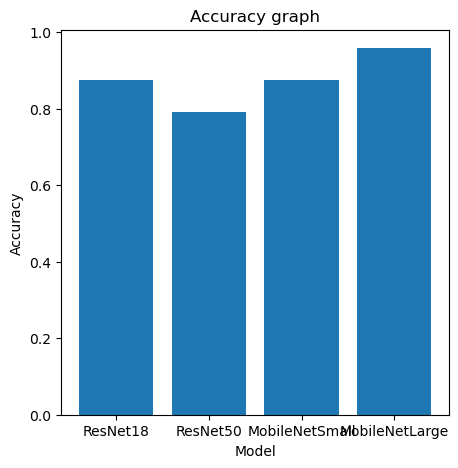

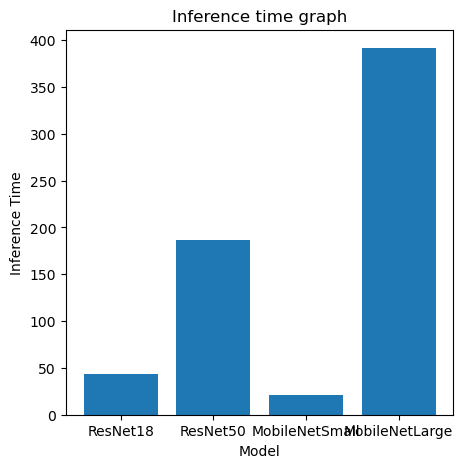

In [18]:
models=['ResNet18', 'ResNet50', 'MobileNetSmall', 'MobileNetLarge']#, 'EfficientNetB0']
inference_time = [res18_results[2]['model_inf_time'],res50_results[2]['model_inf_time'], mobnet_sml_results[2]['model_inf_time'], mobnet_lrg_results[2]['model_inf_time']]#, effnetb0_results[2]['model_inf_time']]
accuracy = [max(res18_results[0]['validation_acc']), max(res50_results[0]['validation_acc']), max(mobnet_sml_results[0]['validation_acc']), max(mobnet_lrg_results[0]['validation_acc'])]#, max(effnetb0_results[0]['validation_acc'])]

print(accuracy)

plt.figure(figsize=(5,5))
plt.bar(models, accuracy)
plt.title('Accuracy graph')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

plt.figure(figsize=(5,5))
plt.bar(models, inference_time)
plt.title('Inference time graph')
plt.xlabel('Model')
plt.ylabel('Inference Time')
plt.show()

In [19]:
data_dir = Path("final_dataset/")
image_shape = (1080, 1920)
resize_factor = 0.3
resize = np.multiply(image_shape,resize_factor)
resize = [int(resize[0]), int(resize[1])]

data_transform = create_transform(resize=resize, rotate=5, flip_h = True, color_dev=True, transf_tensor=True, normalize=True, sp_noise=True, gauss_noise=True)

BATCH_SIZE = 16
train_dl, validation_dl, test_dl, train_data, validation_data, test_data, class_names = create_dataloaders(data_dir, data_transform, batch_size = BATCH_SIZE)

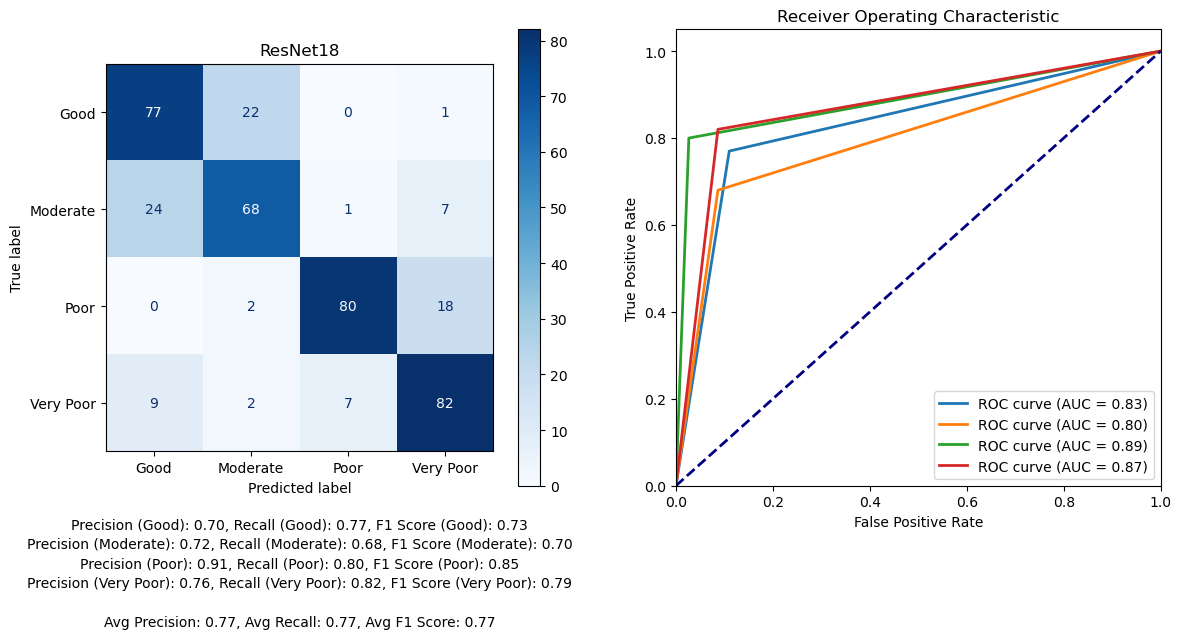

In [20]:
final_res18_model.to(device)
plot_all_measures(final_res18_model,test_dl,device,test_data.classes, "ResNet18")

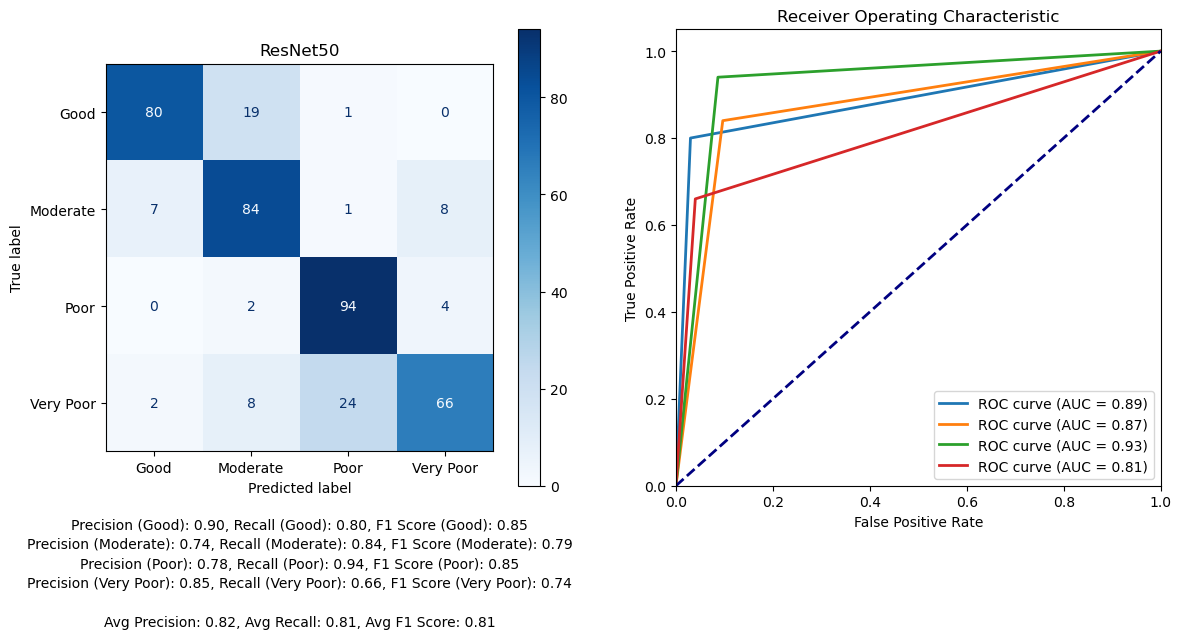

In [21]:
final_res50_model.to(device)
plot_all_measures(final_res50_model,test_dl,device,test_data.classes, "ResNet50")

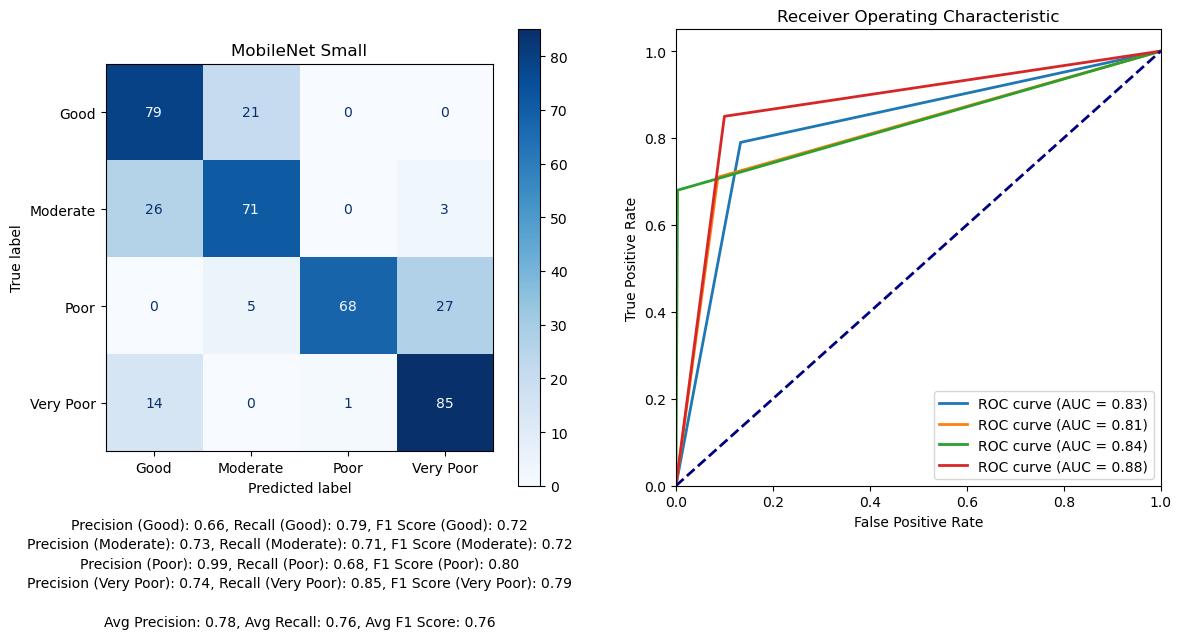

In [22]:
final_mobnet_sml_model.to(device)
plot_all_measures(final_mobnet_sml_model,test_dl,device,test_data.classes, "MobileNet Small")

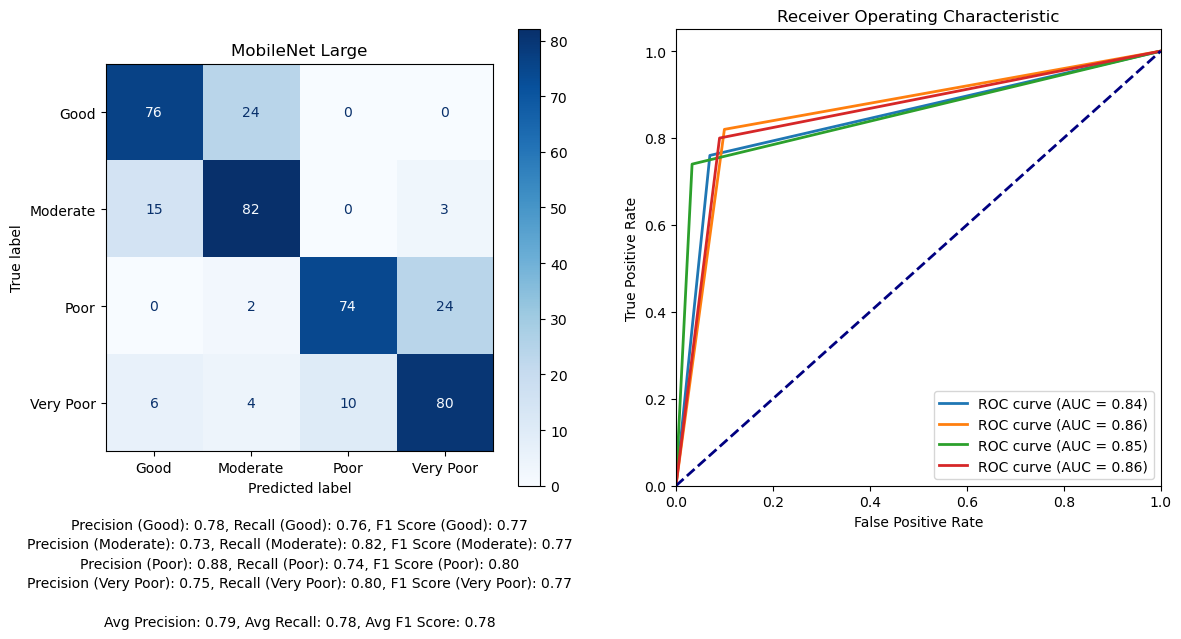

In [23]:
final_mobnet_lrg_model.to(device)
plot_all_measures(final_mobnet_lrg_model,test_dl,device,test_data.classes, "MobileNet Large")

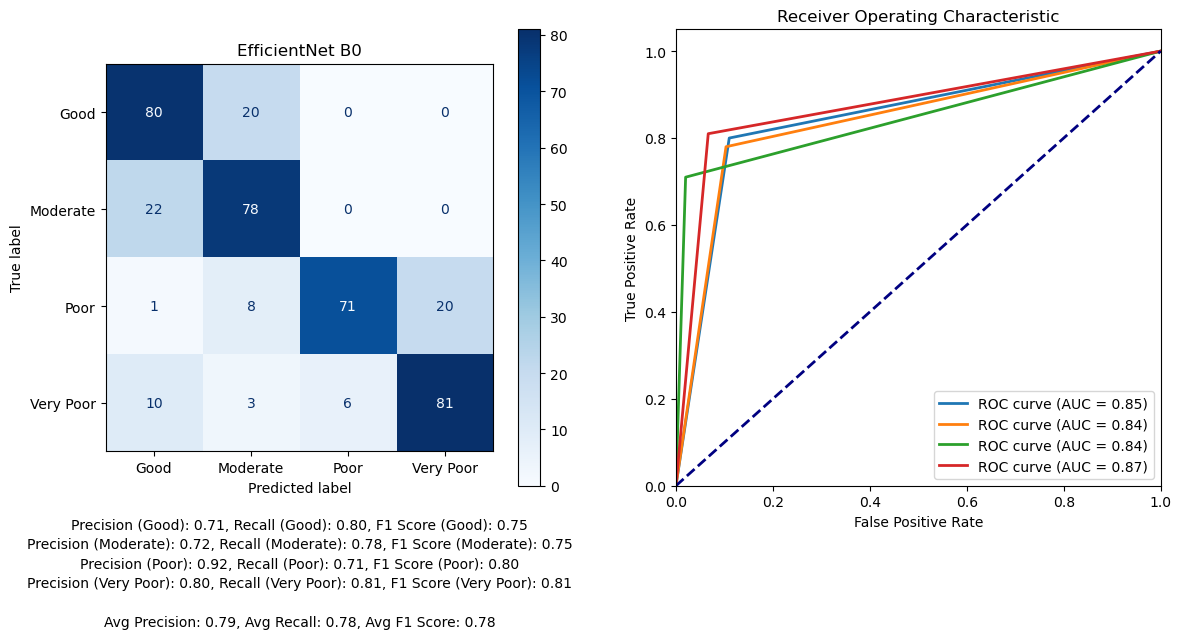

In [24]:
final_effnetb0_model.to(device)
plot_all_measures(final_effnetb0_model,test_dl,device,test_data.classes, "EfficientNet B0")